In [ ]:
!pip install -U scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Objeto Series con el conjunto de datos.
url = 'https://drive.google.com/uc?export=download&id=1XvKsdBs6EG463iN3L1lQv9JXd9lW0JJC'

mintemp = pd.read_csv(url, index_col = 0)
mintemp.head()

,Temp
Date,
1981-01-01,20.700000
1981-01-08,16.585714
1981-01-15,19.214286
1981-01-22,18.514286
1981-01-29,16.814286


In [ ]:
mintemp.describe()

,Temp
count,523.000000
mean,11.197683
std,3.430824
min,2.742857
25%,8.700000
50%,11.057143
75%,13.821429
max,20.700000


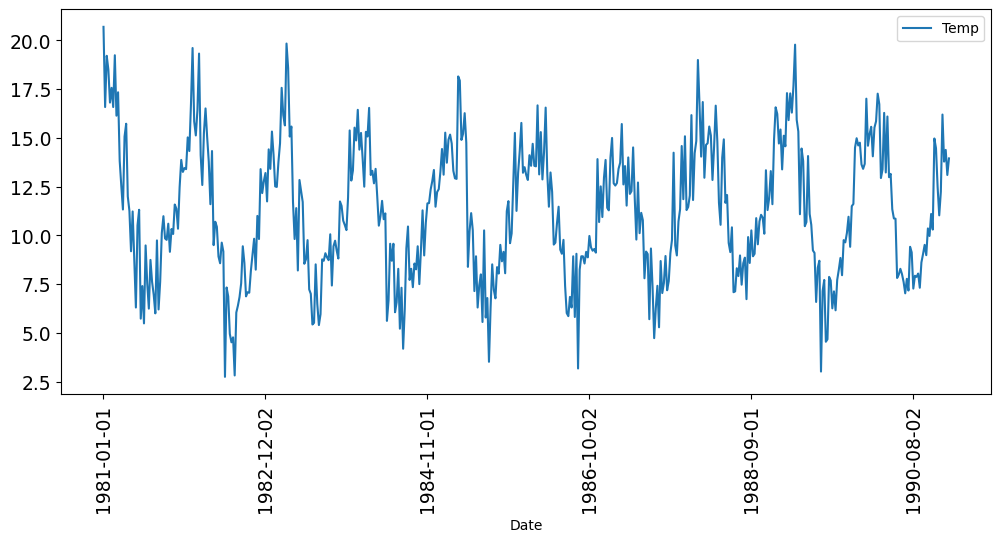

In [ ]:
mintemp.plot(rot=90, figsize = (12, 5), fontsize = 13.5);

In [ ]:
data_train = mintemp.loc[:'1986-12-31']
data_test  = mintemp.loc['1987-01-01':]
data_train.index[-1], data_test.index[0]

('1986-12-25', '1987-01-01')

In [ ]:
def sliding_time(ts, window_size=1):

  n = ts.shape[0] - window_size  
  X = np.empty((n, window_size))
  y = np.empty(n)

  for i in range(window_size, ts.shape[0]):   
    y[i - window_size] = ts[i]
    X[i- window_size, 0:window_size] = np.array(ts[i - window_size:i].transpose())
    
  return X, y

In [ ]:
X_train, y_train = sliding_time(data_train.values, window_size=20) 

In [ ]:
print(f"Número de ejemplos de entrenamiento: {X_train.shape[0]} (Ventana de tamaño {X_train.shape[1]})")
print(f"Número de valores a predecir: {y_train.shape[0]}")

Número de ejemplos de entrenamiento: 293 (Ventana de tamaño 20)
Número de valores a predecir: 293


In [ ]:
X_test, y_test = sliding_time(data_test.values, window_size=20)

In [ ]:
print(f"Número de ejemplos de prueba: {X_test.shape[0]} (Ventana de tamaño {X_test.shape[1]})")
print(f"Número de valores a predecir: {y_test.shape[0]}")

Número de ejemplos de prueba: 190 (Ventana de tamaño 20)
Número de valores a predecir: 190


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,20.700000,16.585714,19.214286,18.514286,16.814286,17.571429,16.585714,19.242857,16.142857,17.342857,13.828571,12.528571,11.328571,15.071429,15.728571,12.000000,11.257143,9.185714,11.228571,8.842857
1,16.585714,19.214286,18.514286,16.814286,17.571429,16.585714,19.242857,16.142857,17.342857,13.828571,12.528571,11.328571,15.071429,15.728571,12.000000,11.257143,9.185714,11.228571,8.842857,6.300000
2,19.214286,18.514286,16.814286,17.571429,16.585714,19.242857,16.142857,17.342857,13.828571,12.528571,11.328571,15.071429,15.728571,12.000000,11.257143,9.185714,11.228571,8.842857,6.300000,10.514286
3,18.514286,16.814286,17.571429,16.585714,19.242857,16.142857,17.342857,13.828571,12.528571,11.328571,15.071429,15.728571,12.000000,11.257143,9.185714,11.228571,8.842857,6.300000,10.514286,11.314286
4,16.814286,17.571429,16.585714,19.242857,16.142857,17.342857,13.828571,12.528571,11.328571,15.071429,15.728571,12.000000,11.257143,9.185714,11.228571,8.842857,6.300000,10.514286,11.314286,5.728571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,6.842857,6.300000,8.928571,5.814286,9.057143,3.171429,8.242857,8.928571,8.928571,8.557143,9.157143,8.871429,9.971429,9.385714,9.214286,9.300000,9.114286,13.914286,10.685714,12.514286
289,6.300000,8.928571,5.814286,9.057143,3.171429,8.242857,8.928571,8.928571,8.557143,9.157143,8.871429,9.971429,9.385714,9.214286,9.300000,9.114286,13.914286,10.685714,12.514286,10.942857
290,8.928571,5.814286,9.057143,3.171429,8.242857,8.928571,8.928571,8.557143,9.157143,8.871429,9.971429,9.385714,9.214286,9.300000,9.114286,13.914286,10.685714,12.514286,10.942857,12.957143
291,5.814286,9.057143,3.171429,8.242857,8.928571,8.928571,8.557143,9.157143,8.871429,9.971429,9.385714,9.214286,9.300000,9.114286,13.914286,10.685714,12.514286,10.942857,12.957143,13.871429


In [ ]:
from sklearn.neural_network import MLPRegressor 

model = MLPRegressor(solver = 'lbfgs',
                   activation = 'relu',
                   hidden_layer_sizes=(120, 60, 30),
                   max_iter=50,                   
                   n_iter_no_change=50, 
                   validation_fraction=0.2,               
                   random_state=1234)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(120, 60, 30), max_iter=50, n_iter_no_change=50,
             random_state=1234, solver='lbfgs', validation_fraction=0.2)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error 

y_pred = model.predict(X_test)

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_pred):.4f}")

Test Mean Squared Error: 	3.1316
Test Mean Absolute Error: 	1.3775
Test Mean squared log error: 	0.0253


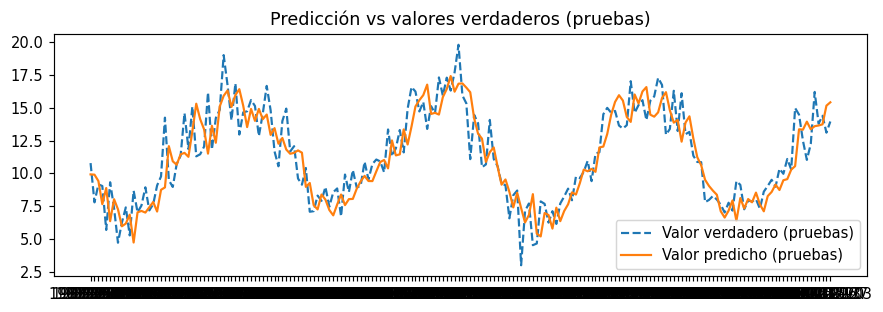

In [ ]:
x = data_test.index[20:]

plt.figure(figsize=(10,3), dpi = 105)
plt.plot(x, y_test, ls = "--", label="Valor verdadero (pruebas)")
plt.plot(x, y_pred, ls = '-', label="Valor predicho (pruebas)")
plt.title("Predicción vs valores verdaderos (pruebas)")
plt.legend();